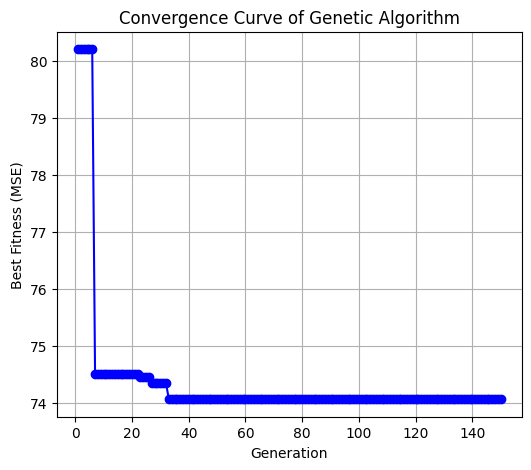

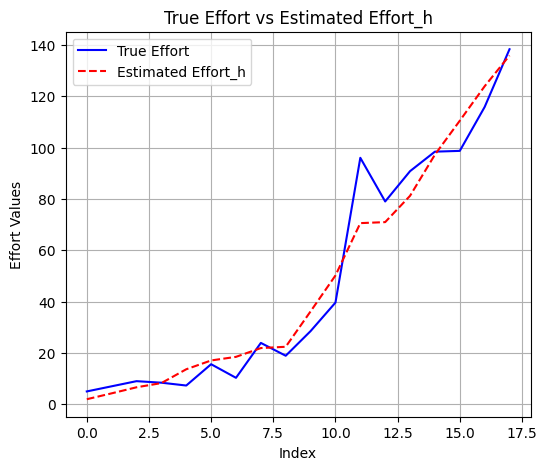

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Input and output data
DL = np.array([2.1, 3.1, 4.2, 5, 7.8, 9.7, 10.5, 12.5, 12.8, 21.5, 31.1, 46.2, 46.5, 54.5, 67.5, 78.6, 90.2, 100.8])
Effort = np.array([5, 7, 9, 8.4, 7.3, 15.6, 10.3, 23.9, 18.9, 28.5, 39.6, 96, 79, 90.8, 98.4, 98.7, 115.8, 138.3])

# Genetic Algorithm Parameters
population_size = 300
num_generations = 150
crossover_rate = 0.8
mutation_rate = 0.01
bounds = [-10, 10]  # Assume reasonable bounds for parameter values

# Initialize population with random values for a, b, and c
def initialize_population(pop_size):
    return [np.random.uniform(bounds[0], bounds[1], 3) for _ in range(pop_size)]

# Fitness function to evaluate how close Effort_h is to Effort
def evaluate_fitness(individual):
    a, b, c = individual
    Effort_h = a * DL**b +  c
    return np.mean((Effort - Effort_h)**2)  # Mean Squared Error

# Selection - Tournament Selection
def tournament_selection(population, fitness_scores, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        aspirants = [random.randint(0, len(population) - 1) for _ in range(tournament_size)]
        selected.append(population[min(aspirants, key=lambda idx: fitness_scores[idx])])
    return selected

# Crossover - Uniform Crossover
def uniform_crossover(parent1, parent2):
    if random.random() < crossover_rate:
        return [p1 if random.random() < 0.5 else p2 for p1, p2 in zip(parent1, parent2)]
    return parent1

# Mutation - Random Reset within Bounds
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

# Genetic Algorithm Execution
def genetic_algorithm():
    population = initialize_population(population_size)
    best_fitness_over_time = []

    for generation in range(num_generations):
        fitness_scores = [evaluate_fitness(ind) for ind in population]
        best_fitness = min(fitness_scores)
        best_individual = population[fitness_scores.index(best_fitness)]

        # Store best fitness for plotting
        best_fitness_over_time.append(best_fitness)

        # Selection
        selected_population = tournament_selection(population, fitness_scores)

        # Crossover and Mutation
        next_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[min(i + 1, len(selected_population) - 1)]
            child1 = uniform_crossover(parent1, parent2)
            child2 = uniform_crossover(parent2, parent1)
            next_population.extend([mutate(child1), mutate(child2)])

        population = next_population

    # Plot convergence curve of best fitness over generations
    plt.figure(figsize=(6, 5))
    plt.plot(range(1, num_generations + 1), best_fitness_over_time, marker='o', color='b', linestyle='-')
    plt.title("Convergence Curve of Genetic Algorithm")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness (MSE)")
    plt.grid(True)
    plt.show()

    return best_individual

# Run the genetic algorithm and display the results
best_solution = genetic_algorithm()

# Generate estimated values Effort_h based on the best solution found by GA
Effort_h = best_solution[0] * DL** best_solution[1] + best_solution[2]

# Plot both True Effort and Estimated Effort_h as line plots
plt.figure(figsize=(6, 5))

# Plot True Effort
plt.plot(Effort, label="True Effort", color="blue", linestyle="-")
# Plot Estimated Effort_h
plt.plot(Effort_h, label="Estimated Effort_h", color="red", linestyle="--")

# Labeling and legend
plt.xlabel("Index")
plt.ylabel("Effort Values")
plt.title("True Effort vs Estimated Effort_h")
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [28]:
print(f"Estimated parameters: a = {best_solution[0]:.3f}, b = {best_solution[1]:.3f}, c = {best_solution[2]:.3f}")

# Calculate the estimated Effort_h based on the best solution
Effort_h = best_solution[0] * DL**best_solution[1] + best_solution[2]

# Calculate Mean Squared Error (MSE)
mse = np.mean((Effort - Effort_h) ** 2)
print("")
print(f"Mean Squared Error (MSE): {mse:.3f}")


Estimated parameters: a = 3.433, b = 0.804, c = -4.269

Mean Squared Error (MSE): 74.067
